In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv("OnlineNewsPopularity.csv")

In [21]:
data

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


# Pre-processing

## Correction des noms de variables

In [22]:
data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [23]:
data.columns = [column.strip() for column in data.columns]

## Données complètes ?

In [24]:
data.isna().sum().sum()

0

On a bien aucune données manquantes comme nous l'indiquait le résumé des données

## Les bons types ?

In [25]:
pd.set_option('display.max_rows', None) #On demande à Pandas de nous afficher toutes les lignes des prochains data frame
pd.DataFrame({"name":data.columns,"type":data.dtypes})

,name,type
url,url,object
timedelta,timedelta,float64
n_tokens_title,n_tokens_title,float64
n_tokens_content,n_tokens_content,float64
n_unique_tokens,n_unique_tokens,float64
n_non_stop_words,n_non_stop_words,float64
n_non_stop_unique_tokens,n_non_stop_unique_tokens,float64
num_hrefs,num_hrefs,float64
num_self_hrefs,num_self_hrefs,float64
num_imgs,num_imgs,float64


In [26]:
pd.set_option('display.max_rows', 10) #Je remets le paramètre par défaut

On peut remarquer que des colomnes n'ont pas le bon type, comme par exemple weekday_is_sunday qui devrait être un booléen mais qui est un float

Corrigeons cela

In [27]:
for column in ["weekday_is_monday","weekday_is_tuesday", "weekday_is_wednesday","weekday_is_thursday",
               "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend"]:
    data[column] = data[column].astype("bool")

In [28]:
len(data[sum([data.data_channel_is_bus,
          data.data_channel_is_entertainment,
          data.data_channel_is_lifestyle,
          data.data_channel_is_socmed,
          data.data_channel_is_tech,
          data.data_channel_is_world])
     >=2])

0

In [29]:
len(data[sum([data.data_channel_is_bus,
          data.data_channel_is_entertainment,
          data.data_channel_is_lifestyle,
          data.data_channel_is_socmed,
          data.data_channel_is_tech,
          data.data_channel_is_world])
     ==0])

6134

On en déduit que les articles ont au plus une et une seule catégorie

In [30]:
for column in ["data_channel_is_bus","data_channel_is_entertainment", "data_channel_is_lifestyle","data_channel_is_socmed",
               "data_channel_is_tech","data_channel_is_world"]:
    data[column] = data[column].astype("bool")

In [31]:
pd.set_option('display.max_rows', None) #On demande à Pandas de nous afficher toutes les lignes des prochains data frame
pd.DataFrame({"name":data.columns,"type":data.dtypes})

,name,type
url,url,object
timedelta,timedelta,float64
n_tokens_title,n_tokens_title,float64
n_tokens_content,n_tokens_content,float64
n_unique_tokens,n_unique_tokens,float64
n_non_stop_words,n_non_stop_words,float64
n_non_stop_unique_tokens,n_non_stop_unique_tokens,float64
num_hrefs,num_hrefs,float64
num_self_hrefs,num_self_hrefs,float64
num_imgs,num_imgs,float64


In [32]:
pd.set_option('display.max_rows', 10) #Je remets le paramètre par défaut

## Intégrité des données

### Les données de dates

In [33]:
data[(data["weekday_is_saturday"]) | (data["weekday_is_sunday"])]["is_weekend"].value_counts()

True    5190
Name: is_weekend, dtype: int64

In [34]:
data[(data["weekday_is_saturday"]==0) & (data["weekday_is_sunday"]==0)]["is_weekend"].value_counts()

False    34454
Name: is_weekend, dtype: int64

La colonnes "is_weekend" cohérente avec les variables "weekday_is_saturday" et "weekday_is_sunday"

# Prédictions

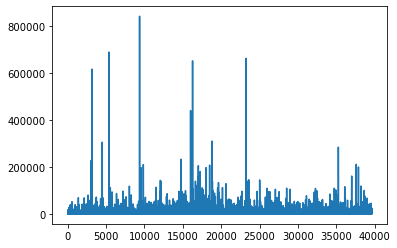

In [35]:
plt.plot(data["shares"])

In [36]:
!pip install seaborn

You should consider upgrading via the 'C:\Users\banan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [37]:
import matplotlib.pyplot as plt


In [38]:
categories = sum([1 * data.data_channel_is_bus,
          2 * data.data_channel_is_entertainment,
          3 * data.data_channel_is_lifestyle,
          4 * data.data_channel_is_socmed,
          5 * data.data_channel_is_tech,
          6 * data.data_channel_is_world])
categories

0        2
1        1
2        1
3        2
4        5
        ..
39639    5
39640    4
39641    0
39642    6
39643    2
Length: 39644, dtype: int32

In [39]:
Df = pd.DataFrame({
                    "category": categories,
                    "shares": data.shares
})
data['category'] = categories
data['category'].value_counts()

6    8427
5    7346
2    7057
1    6258
0    6134
4    2323
3    2099
Name: category, dtype: int64

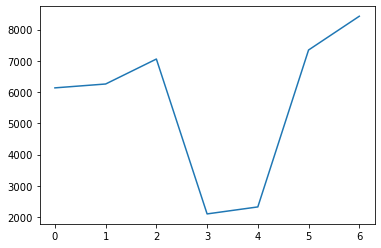

In [40]:
plt.plot(Df['category'].value_counts().sort_index())

## Arbre de décision

In [41]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [42]:
X = data.drop(columns=["url","shares"]) #On enlève les colonnes inutiles + la colonne du data set que l'on souhaite prédire
Y = data["shares"] >= 1400

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33) #On divise le data set en train set et test set

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [44]:
model.score(X_test, Y_test)

0.6327294962928992

[Text(558.0, 951.3000000000001, 'kw_avg_avg <= 2909.821\ngini = 0.498\nsamples = 26561\nvalue = [12480, 14081]'),
 Text(279.0, 679.5, 'timedelta <= 605.5\ngini = 0.493\nsamples = 13764\nvalue = [7703, 6061]'),
 Text(139.5, 407.70000000000005, 'data_channel_is_tech <= 0.5\ngini = 0.48\nsamples = 10603\nvalue = [6370, 4233]'),
 Text(69.75, 135.89999999999998, 'gini = 0.458\nsamples = 8226\nvalue = [5299, 2927]'),
 Text(209.25, 135.89999999999998, 'gini = 0.495\nsamples = 2377\nvalue = [1071, 1306]'),
 Text(418.5, 407.70000000000005, 'is_weekend <= 0.5\ngini = 0.488\nsamples = 3161\nvalue = [1333, 1828]'),
 Text(348.75, 135.89999999999998, 'gini = 0.495\nsamples = 2826\nvalue = [1270, 1556]'),
 Text(488.25, 135.89999999999998, 'gini = 0.305\nsamples = 335\nvalue = [63, 272]'),
 Text(837.0, 679.5, 'data_channel_is_entertainment <= 0.5\ngini = 0.468\nsamples = 12797\nvalue = [4777, 8020]'),
 Text(697.5, 407.70000000000005, 'self_reference_min_shares <= 1750.0\ngini = 0.444\nsamples = 10220\

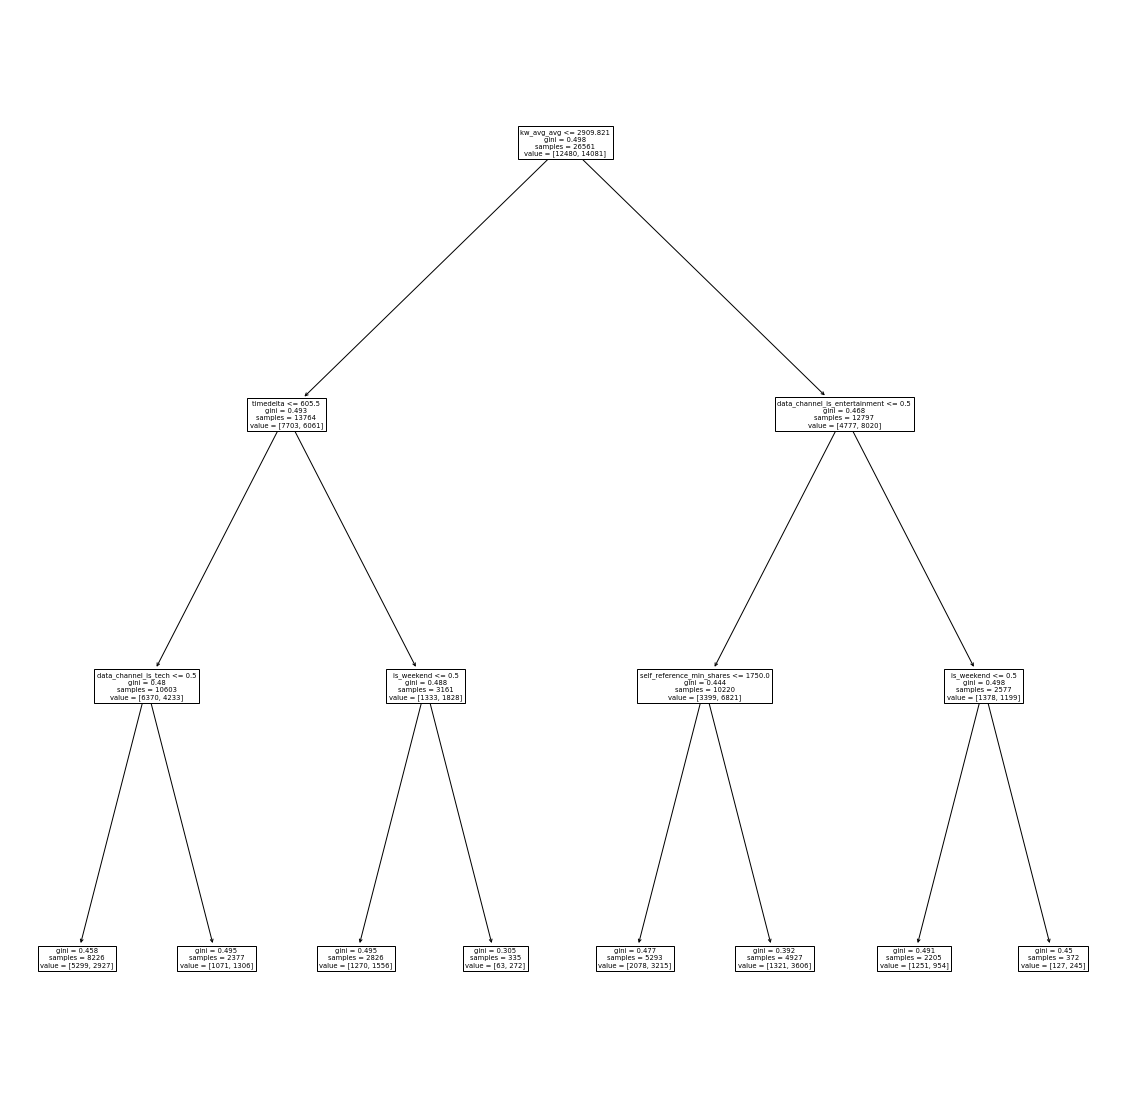

In [45]:
plt.figure(figsize=(20,20))
plot_tree(model, feature_names=X.columns)

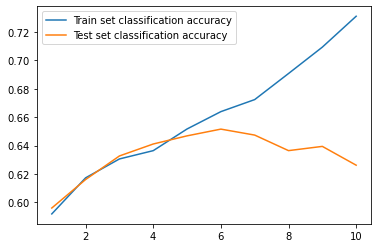

In [46]:
Score_trainset = []
Score_testset = []
for i in range(1,10+1):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, Y_train)
    
    Score_trainset.append(model.score(X_train, Y_train))
    Score_testset.append(model.score(X_test, Y_test))
    
line1, = plt.plot(range(1, 10+1), Score_trainset )
line1.set_label("Train set classification accuracy")

line2, = plt.plot(range(1, 10+1), Score_testset)
line2.set_label("Test set classification accuracy")

plt.legend()

Il y a sur-apprentissage (overfiiting) avec un arbre de décision de profondeur supérieure ou égale à 5.
A l'inverse il y a sous-apprentissage (underfitting)avec un arble de décision ayant une profondeur inférieur à 3.
Par conséquent les profondeurs optimales de notre arbre de décision sont 3 et 4. Avec une fiabilité de prédiction égale à 63%.

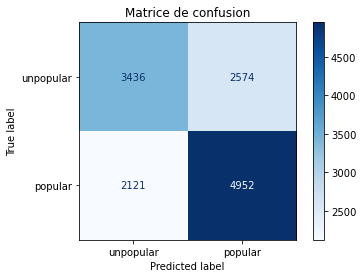

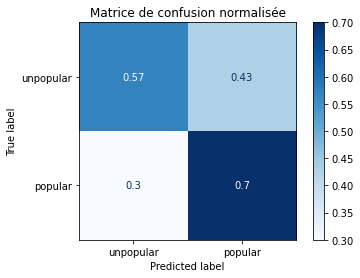

In [47]:
model_retenu = DecisionTreeClassifier(max_depth=4)
model_retenu.fit(X_train, Y_train)
# Plot non-normalized confusion matrix
titles_options = [("Matrice de confusion", None),
                  ("Matrice de confusion normalisée", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_retenu, X_test, Y_test,
                                 display_labels=["unpopular","popular"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

On remarque de les articles populaires sont sont bien prédit. Mais que notre modèle a du mal à faire une prédiction lorsque qu'on lui donne en entrée un article peu populaire

## Amélioration du modèle

### Random forest

Esssayons d'améliorer cette prédiction en utilisant plusieurs arbre de décision au lieu d'un seul

In [48]:
from sklearn.ensemble import RandomForestClassifier

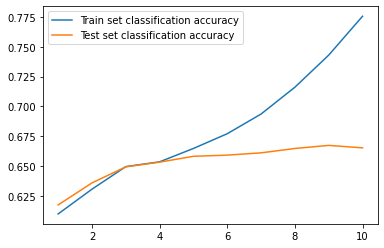

In [49]:
Score_trainset = []
Score_testset = []
for i in range(1,10+1):
    model = RandomForestClassifier(n_estimators=100, max_depth=i)
    model.fit(X_train, Y_train)
    
    Score_trainset.append(model.score(X_train, Y_train))
    Score_testset.append(model.score(X_test, Y_test))
    
line1, = plt.plot(range(1, 10+1), Score_trainset )
line1.set_label("Train set classification accuracy")

line2, = plt.plot(range(1, 10+1), Score_testset)
line2.set_label("Test set classification accuracy")

plt.legend()

In [50]:
model_retenu_rf = RandomForestClassifier(n_estimators=100, max_depth=5)
model_retenu_rf.fit(X_train, Y_train)
model_retenu_rf.score(X_test, Y_test)

0.6581059390048154

On peut voir qu'ici la profondeur optimale de notre arbre de décision est de 5. Avec une **fiabilité de prédiction égale à 66%**.
Cette fiabilité de prédiction est légèrement inférieur à celle des rechercheurs (67%)

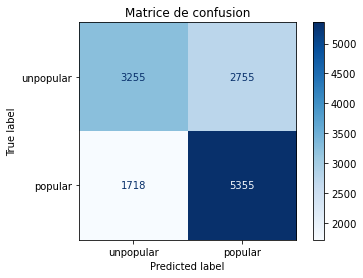

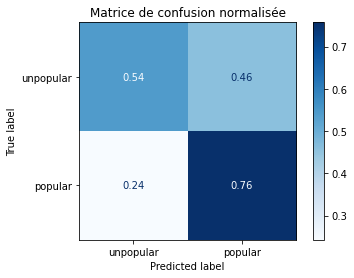

In [51]:
# Plot non-normalized confusion matrix
titles_options = [("Matrice de confusion", None),
                  ("Matrice de confusion normalisée", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_retenu_rf, X_test, Y_test,
                                 display_labels=["unpopular","popular"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

L'utilisation de la méthode de Random Forest nous a permit de d'augmenter la précision totale de notre model.
Cependant on remarque que la prédiction les articles peu populaire est difficile à classifier.